In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [30]:
df = pd.read_csv('data/StudentsPerformance.csv')

In [31]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [32]:
df.iloc[:, :5].nunique()

gender                         2
race/ethnicity                 5
parental level of education    6
lunch                          2
test preparation course        2
dtype: int64

In [33]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [34]:
df.gender.unique()

array(['female', 'male'], dtype=object)

In [35]:
print(df['race/ethnicity'].unique())

['group B' 'group C' 'group A' 'group D' 'group E']


In [36]:
print(df['parental level of education'].unique())

["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']


In [37]:
print(df.lunch.unique())

['standard' 'free/reduced']


In [38]:
print(df['test preparation course'].unique())

['none' 'completed']


In [39]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

In [40]:
print('We\'ve got {} numerical features: {}'.format(len(numerical_features), numerical_features))
print('We\'ve got {} numerical features: {}'.format(len(categorical_features), categorical_features))

We've got 3 numerical features: ['math score', 'reading score', 'writing score']
We've got 5 numerical features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [41]:
df['Total Score'] = df[numerical_features].sum(axis=1)
df['Average'] = df[numerical_features].mean(axis=1)

In [42]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [43]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'Total Score', 'Average'],
      dtype='object')

In [47]:
print(df[df['reading score']==100]['Average'].count())
print(df[df['math score']==100]['Average'].count())
print(df[df['writing score']==100]['Average'].count())

17
7
14


In [45]:
len(df[df['reading score']==100])

17

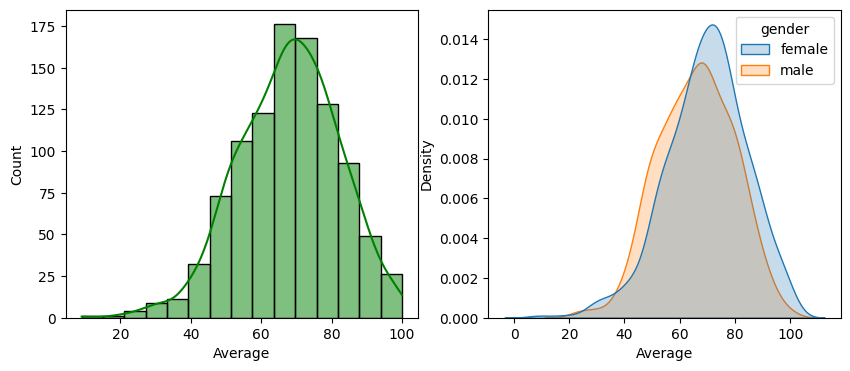

In [53]:
fig, ax = plt.subplots(1,
                       2,
                       figsize=(10,4))

sns.histplot(data=df, x='Average', bins=15, ax=ax[0], color='g', kde=True)
ax[1] = sns.kdeplot(data=df, x='Average', hue='gender', ax=ax[1], fill=True)

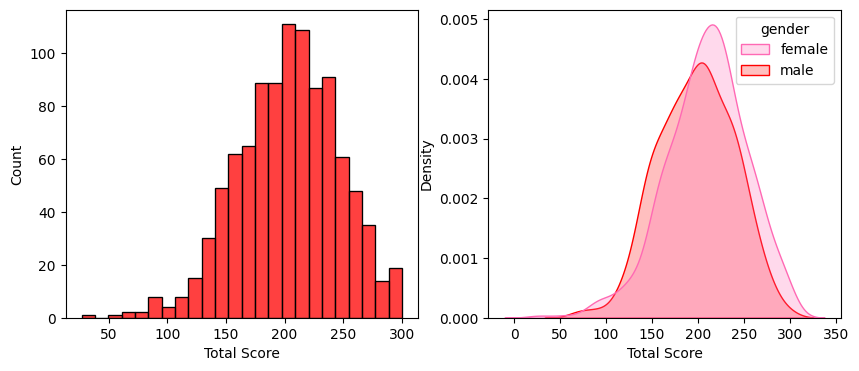

In [65]:
fig, ax = plt.subplots(1, 2, figsize=(10,4))

sns.histplot(data=df, x='Total Score', ax=ax[0], color='r')
sns.kdeplot(data=df, x='Total Score', hue='gender', ax=ax[1], fill=True, palette=['hotpink', 'red']);

### So as you see female students perform better than male students

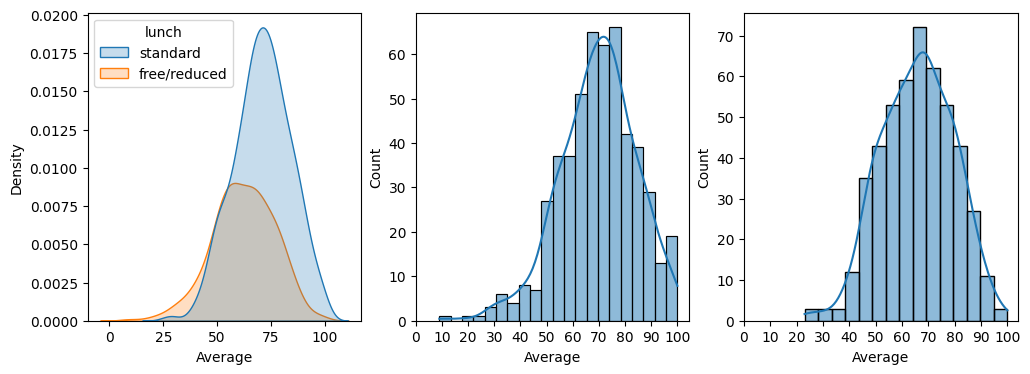

In [100]:
fig, ax = plt.subplots(1, 3, figsize=(12,4))
sns.kdeplot(data=df, x='Average', hue='lunch', ax=ax[0], fill=True)
sns.histplot(data=df[df['gender'] == 'female'], x='Average', ax=ax[1], kde=True);
sns.histplot(data=df[df['gender'] == 'male'], x='Average', ax=ax[2], kde=True);
ax[1].set_xticks(range(0, 110, 10));
ax[2].set_xticks(range(0, 110, 10));